In [50]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
import matplotlib.pylab as plt
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax
from common.gradient import numerical_gradient

In [51]:
def init_network():
    with open("../ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [52]:
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

### 미니배치 학습

In [53]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [54]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [55]:
print(x_batch.shape)
print(t_batch.shape)

(10, 784)
(10,)


#### 인덱싱 연습

In [56]:
network = init_network()
y = predict(network, x_batch)
arange = np.arange(batch_size)
t = t_batch
q = y[arange, t]
print(y)
print(arange)
print(t)
print(q)

[[1.51576653e-01 4.76892892e-05 4.90672998e-02 1.99982151e-03
  3.67826829e-03 7.69414455e-02 1.95938628e-02 3.17356375e-04
  6.90841854e-01 5.93570806e-03]
 [1.22606580e-03 9.34315176e-05 8.88577633e-05 2.36538137e-04
  7.98769361e-06 9.03464675e-01 9.84664730e-05 3.27837711e-06
  9.47628543e-02 1.77614529e-05]
 [4.13948546e-05 1.31342473e-04 3.37805017e-03 2.37919652e-04
  3.29992501e-04 3.26218619e-03 1.35761002e-04 2.07008125e-05
  9.91555631e-01 9.07056383e-04]
 [4.14846836e-05 1.49030867e-03 9.87948850e-04 2.39041797e-03
  1.36454284e-04 4.72249053e-02 1.10384601e-04 1.08946724e-05
  9.47279394e-01 3.27794754e-04]
 [2.30843634e-05 5.55063691e-03 9.60738420e-01 2.67580766e-02
  1.56095638e-07 2.05233868e-04 3.25571491e-05 4.55276750e-04
  6.23405678e-03 2.47580306e-06]
 [4.97123547e-05 4.20737621e-07 5.11912185e-06 3.52276438e-05
  4.16924513e-06 2.10774873e-04 8.42556425e-09 9.96492684e-01
  6.29099122e-06 3.19554843e-03]
 [4.82841460e-05 8.40372013e-05 1.03920710e-03 9.95227456e

### 경사법

####  x0^2 + x1^2 의 최솟값

In [57]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [58]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

In [59]:
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
print(x)

[-6.11110793e-10  8.14814391e-10]


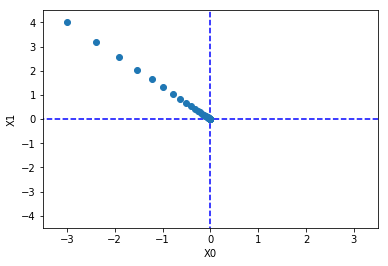

In [60]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 신경망에서의 기울기

In [61]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [62]:
net = simpleNet()
print(net.W) # 가중치 매개변수

x = np.array([0.6, 0.9]) # 입력 데이터
p = net.predict(x)
print(p)
np.argmax(p) # 최댓값의 인덱스

t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

[[ 1.1335665   0.5848084  -0.60728586]
 [-0.36587136 -1.18433887  0.41401769]]
[ 0.35085568 -0.71501994  0.00824441]


1.0625657354141016

In [67]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.29207348  0.1005917  -0.39266518]
 [ 0.43811022  0.15088756 -0.58899777]]
